# **Praktikum II & III Machine Learning and Modern Prediction**

'''
=================================================
Nama  : Anggun Paila

NPM   : F1F022013

=================================================
'''

# Latar Belakang

<div align="justify"> Perkembangan teknologi machine learning telah mendorong penggunaan model prediktif dalam berbagai bidang, termasuk tugas regresi yang digunakan untuk memperkirakan nilai kontinu berdasarkan fitur input. Algoritma machine learning modern mampu menangkap hubungan non-linear dan pola kompleks yang sulit dimodelkan oleh pendekatan statistik tradisional. Halder et al. (2024) menyatakan bahwa algoritma non-parametric seperti K-Nearest Neighbors (KNN) dan model berbasis pohon semakin banyak digunakan karena fleksibilitasnya dalam menangani data dengan distribusi tidak beraturan. </div>

<div align="justify"> Metode Regression Tree, yang merupakan bagian dari decision tree regression, bekerja dengan membagi ruang fitur ke dalam beberapa wilayah prediksi melalui pembentukan struktur pohon. Pendekatan ini mampu memodelkan interaksi antarvariabel dan hubungan non-linear secara intuitif. Menurut Putra (2025), regresi berbasis pohon sering dipilih karena mudah diinterpretasi dan efektif ketika pola hubungan variabel sulit ditangkap oleh model linear. Selain itu, model ini tetap kompetitif dalam banyak aplikasi prediksi sederhana hingga menengah. </div>

<div align="justify"> Di sisi lain, metode K-Nearest Neighbors (KNN) merupakan algoritma berbasis kedekatan yang menentukan nilai prediksi dengan melihat nilai target dari tetangga terdekat dalam ruang fitur. KNN tidak memerlukan proses pelatihan yang kompleks dan bekerja sangat baik untuk pola data yang bersifat lokal. Halder et al. (2024) menjelaskan bahwa berbagai modifikasi KNN mampu meningkatkan akurasi prediktif, terutama ketika struktur data tidak menunjukkan korelasi linear yang kuat. Dengan mempertimbangkan karakteristik kedua algoritma tersebut, praktikum ini bertujuan membandingkan performa Regression Tree dan KNN pada tugas regresi untuk menentukan model yang paling tepat digunakan. </div>


# Rumusan Masalah

Rumusan masalah pada pertemuan ini adalah:
1.   Apa konsep dasar algoritma Regression Tree dan K-Nearest Neighbors (KNN)?
2.   Bagaimana cara engimplementasikan Regression Tree dan KNN menggunakan pustaka Scikit-learn di Python.
3.  Bagaimana cara mengevaluasi performa model Regression Tree dan KNN menggunakan *accuracy score* dan *confusion matrix*.

# Tujuan Penelitian


Tujuan pada pertemuan ini adalah sebagai berikut:

1.   Mahasiswa mampu memahami konsep dasar algoritma Regression Tree dan K-Nearest Neighbors (KNN).
2.   Mahasiswa mampu mengimplementasikan Regression Tree dan KNN menggunakan pustaka Scikit-learn di Python.
3.  Mahasiswa mampu mengevaluasi performa model Regression Tree dan KNN menggunakan accuracy score dan confusion matrix.


# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [2]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 14.8 MB/s eta 0:00:00


In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,  OrdinalEncoder, LabelEncoder,  StandardScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Memuat Data

Dataset yang akan digunakan adalah "BMW sales data (2010-2024)" untuk memprediksi volume penjualan mobil MBW.
Hingga akhirnya harus membandingkan kinerja kedua model tersebut dan memberikan kesimpulan model mana yang lebih baik untuk dataset ini. Dataset yang digunakan adalah BMW sales data (2010-2024) https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv.

In [4]:
# Load penelitian Dataset
bmw_df = pd.read_csv(' https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv', sep=';')
bmw_df.head(10)

Model  Year         Region   Color Fuel_Type Transmission  \
0  5 Series  2016           Asia     Red    Petrol       Manual   
1        i8  2013  North America     Red    Hybrid    Automatic   
2  5 Series  2022  North America    Blue    Petrol    Automatic   
3        X3  2024    Middle East    Blue    Petrol    Automatic   
4  7 Series  2020  South America   Black    Diesel       Manual   
5  5 Series  2017    Middle East  Silver    Diesel       Manual   
6        i8  2022         Europe   White    Diesel       Manual   
7        M5  2014           Asia   Black    Diesel    Automatic   
8        X3  2016  South America   White    Diesel    Automatic   
9        i8  2019         Europe   White  Electric       Manual   

   Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  
0            3.5      151748      98740          8300  
1            1.6      121671      79219          3428  
2            4.5       10991     113265          6994  
3            1.7       27255      60971          4047  
4            2.1      122131      49898          3080  
5            1.9      171362      42926          1232  
6            1.8      196741      55064          7949  
7            1.6      121156     102778           632  
8            1.7       48073     116482          8944  
9            3.0       35700      96257          4411

In [5]:
# Melihat dimensi data
bmw_df.shape

(50000, 10)

In [6]:
#melihat tipe data
bmw_df.dtypes

Model             object
Year               int64
Region            object
Color             object
Fuel_Type         object
Transmission      object
Engine_Size_L    float64
Mileage_KM         int64
Price_USD          int64
Sales_Volume       int64
dtype: object

In [7]:
# Check Missing Values
bmw_df.isnull().sum()

Model            0
Year             0
Region           0
Color            0
Fuel_Type        0
Transmission     0
Engine_Size_L    0
Mileage_KM       0
Price_USD        0
Sales_Volume     0
dtype: int64

# Analisis Data Eksploratif

In [8]:
bmw_df.describe()

Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000

from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Engine_Size_L'].plot(kind='hist', bins=20, title='Engine_Size_L')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Mileage_KM'].plot(kind='hist', bins=20, title='Mileage_KM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Price_USD'].plot(kind='hist', bins=20, title='Price_USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Engine_Size_L', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Engine_Size_L', y='Mileage_KM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Mileage_KM', y='Price_USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Price_USD', y='Sales_Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Engine_Size_L']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Engine_Size_L')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Mileage_KM']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Mileage_KM')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Price_USD']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Price_USD')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Sales_Volume']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Sales_Volume')

from matplotlib import pyplot as plt
_df_12['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Engine_Size_L'].plot(kind='line', figsize=(8, 4), title='Engine_Size_L')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Mileage_KM'].plot(kind='line', figsize=(8, 4), title='Mileage_KM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Price_USD'].plot(kind='line', figsize=(8, 4), title='Price_USD')
plt.gca().spines[['top', 'right']].set_visible(False)

<div align="justify">
-------
</div>

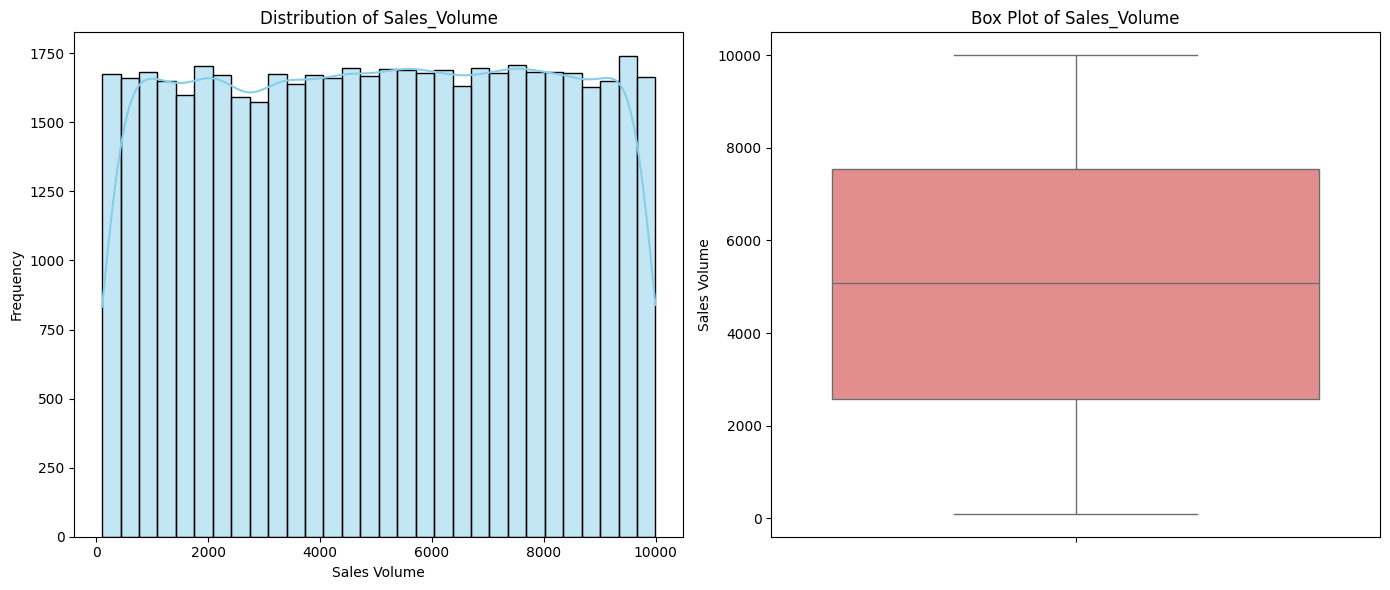

In [9]:
# Set up the figure and axes for subplots
plt.figure(figsize=(14, 6))

# Histogram for Sales_Volume
plt.subplot(1, 2, 1)
sns.histplot(bmw_df['Sales_Volume'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sales_Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')

# Box plot for Sales_Volume
plt.subplot(1, 2, 2)
sns.boxplot(y=bmw_df['Sales_Volume'], color='lightcoral')
plt.title('Box Plot of Sales_Volume')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

<div align="justify">
Pada histogram menunjukkan bahwa Sales Volume tersebar cukup merata di seluruh rentang nilai, tanpa adanya konsentrasi tertentu—menandakan distribusi yang cenderung uniform. Frekuensi tiap interval relatif sama, sehingga tidak terlihat puncak atau pola khusus. Sementara itu, boxplot memperlihatkan bahwa nilai tengah (median) berada sekitar 5.000, dengan sebaran data yang cukup luas dari nilai minimum mendekati 0 hingga maksimum mendekati 10.000, namun tanpa outlier yang mencolok. Secara keseluruhan, kedua visualisasi ini menggambarkan bahwa data Sales Volume memiliki penyebaran yang sangat lebar dan merata di seluruh rentang, dengan variabilitas yang tinggi tetapi tidak menunjukkan anomali ekstrem.
</div>

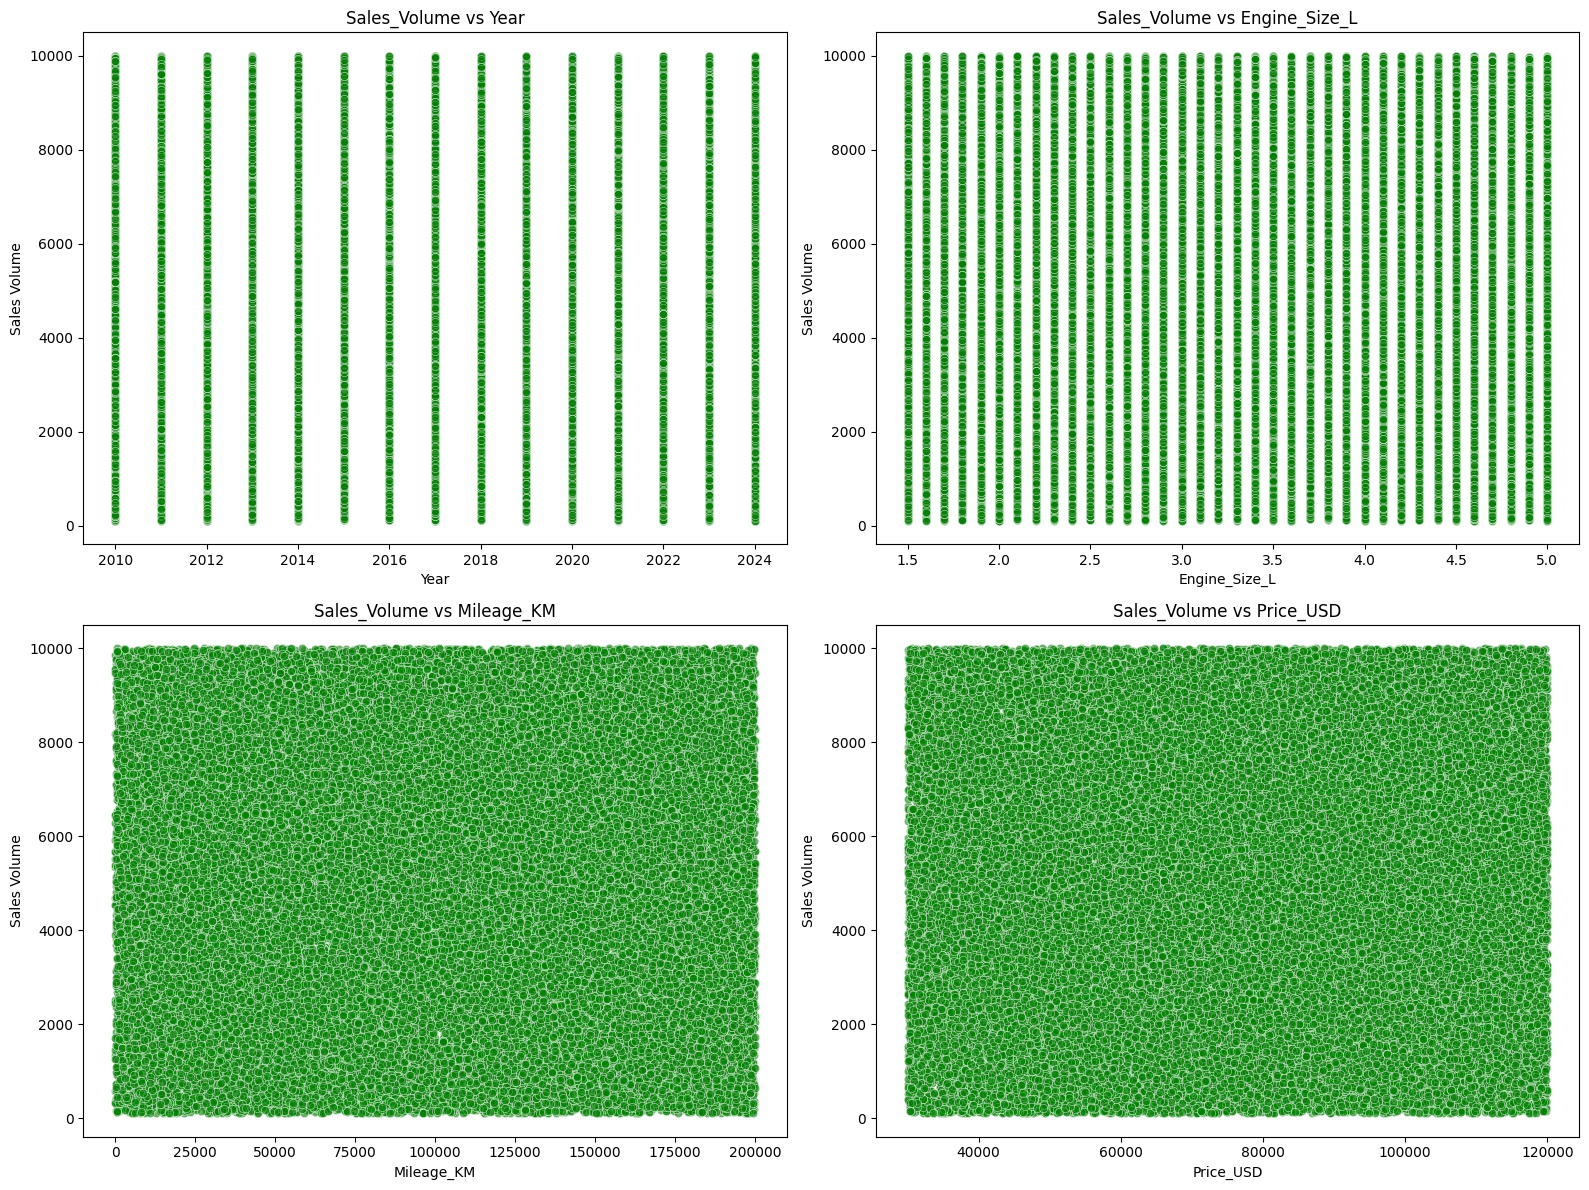

In [10]:
numerical_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=bmw_df[feature], y=bmw_df['Sales_Volume'], color='green', alpha=0.6)
    plt.title(f'Sales_Volume vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

<div align="justify">
Keempat scatter plot tersebut menunjukkan bahwa Sales Volume tidak memiliki pola hubungan yang jelas dengan Year, Engine Size, Mileage, maupun Price. Pada semua grafik, titik-titik data tersebar merata di seluruh rentang variabel, sehingga tidak tampak tren naik/turun, pola linear, maupun hubungan nonlinear. Penyebaran yang sangat acak ini menunjukkan bahwa perubahan tahun kendaraan, ukuran mesin, jarak tempuh, maupun harga tidak memberikan pengaruh berarti terhadap variasi Sales Volume dalam data ini. </div>

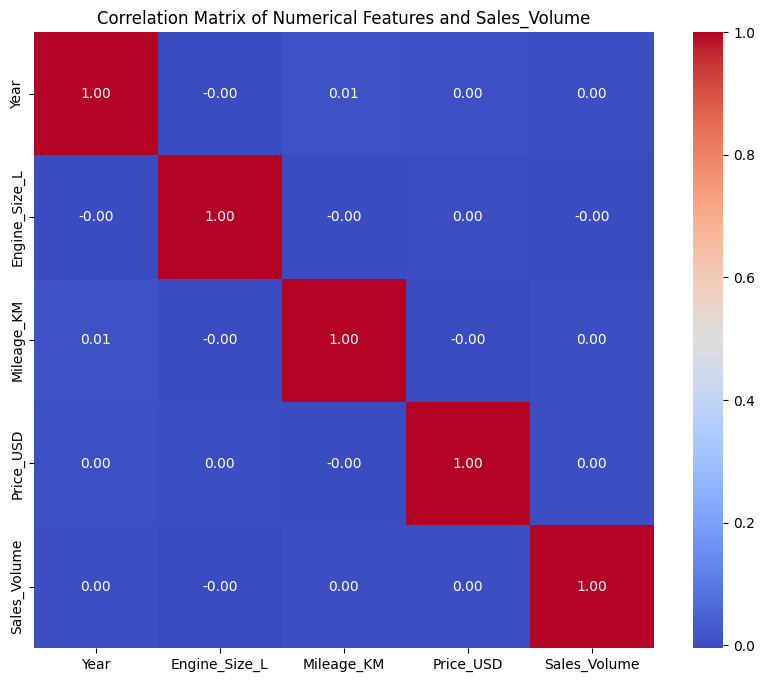

In [11]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
correlation_matrix = bmw_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Sales_Volume')
plt.show()

<div align="justify">
Heatmap korelasi tersebut menunjukkan bahwa tidak ada hubungan linear yang signifikan antara Sales Volume dengan variabel numerik lainnya seperti Year, Engine Size, Mileage, maupun Price. Nilai korelasi antara Sales Volume dan semua variabel berada sangat dekat dengan 0, yang berarti perubahan pada variabel-variabel tersebut tidak berhubungan dengan peningkatan atau penurunan Sales Volume. Begitu pula hubungan antar variabel numerik lainnya, semuanya menunjukkan korelasi yang sangat lemah atau nyaris tidak ada.
</div>

# _Feature Engineering_

## A - Missing Value

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data. **Pada dataset ini tidak terdapat Missing Value**

## B - Kardinalitas

## C- Splitting Data

In [12]:
#mendeskripsikan variabel X dan y
X = bmw_df.drop('Sales_Volume', axis = 1)
y = bmw_df['Sales_Volume']

In [13]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=200)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (37500, 9)
Test size  :  (12500, 9)


## D- Handling Outlier

## E- Scaling

In [14]:
# Identify numerical features directly from X_train
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Initialize lists to store feature names based on skewness
nilai_skew = []
nilai_skew_normal = []

# Calculate skewness for each numerical feature in X_train
print("Calculating skewness for numerical features in X_train:")
for feature in numerical_features:
    skewness = X_train[feature].skew()
    print(f"  {feature}: {skewness:.4f}")
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(feature)
    else:
        nilai_skew.append(feature)

# Display the categorized features
print('\nKolom yang mempunyai nilai skewness sedang (skewed):', nilai_skew)
print('Kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

Calculating skewness for numerical features in X_train:
  Year: -0.0108
  Engine_Size_L: -0.0075
  Mileage_KM: -0.0079
  Price_USD: 0.0075

Kolom yang mempunyai nilai skewness sedang (skewed): []
Kolom yang mempunyai nilai skewness normal: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']


In [15]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']
scaler = StandardScaler()

# Apply fit_transform to X_train for numerical columns
X_train_scaled = X_train.copy() # Create a copy to avoid modifying original X_train directly if not intended
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply transform to X_test for numerical columns
X_test_scaled = X_test.copy() # Create a copy to avoid modifying original X_test directly if not intended
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features in X_train and X_test have been scaled using StandardScaler.")
print("X_train_scaled head:\n", X_train_scaled[numerical_cols].head())
print("X_test_scaled head:\n", X_test_scaled[numerical_cols].head())

Numerical features in X_train and X_test have been scaled using StandardScaler.
X_train_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
28475 -0.473404       0.545830    1.243500  -1.039395
10801 -1.166587       0.545830    1.507087  -0.504411
10124 -1.397648      -0.246990   -1.310046   0.076110
4822  -1.166587      -0.346092    1.436374   1.015719
21632 -0.473404      -0.841605    0.712481   0.823966
X_test_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
20518  0.681901       0.744035   -1.218395  -1.583478
20570 -0.704465       1.437753   -1.325379   0.458581
38530  1.375084      -0.048785   -1.577341   0.601264
39945 -0.242343       0.644933    0.781107  -0.668212
1713  -0.242343      -0.643400   -1.340367  -1.698745


## F- Encoding

## G- Balancing Data

# _Training Model_

In [18]:
# Initialize and train the DecisionTreeRegressor model
reg_tree_model = DecisionTreeRegressor(random_state=42)
reg_tree_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
# Initialize and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

KNeighborsRegressor()

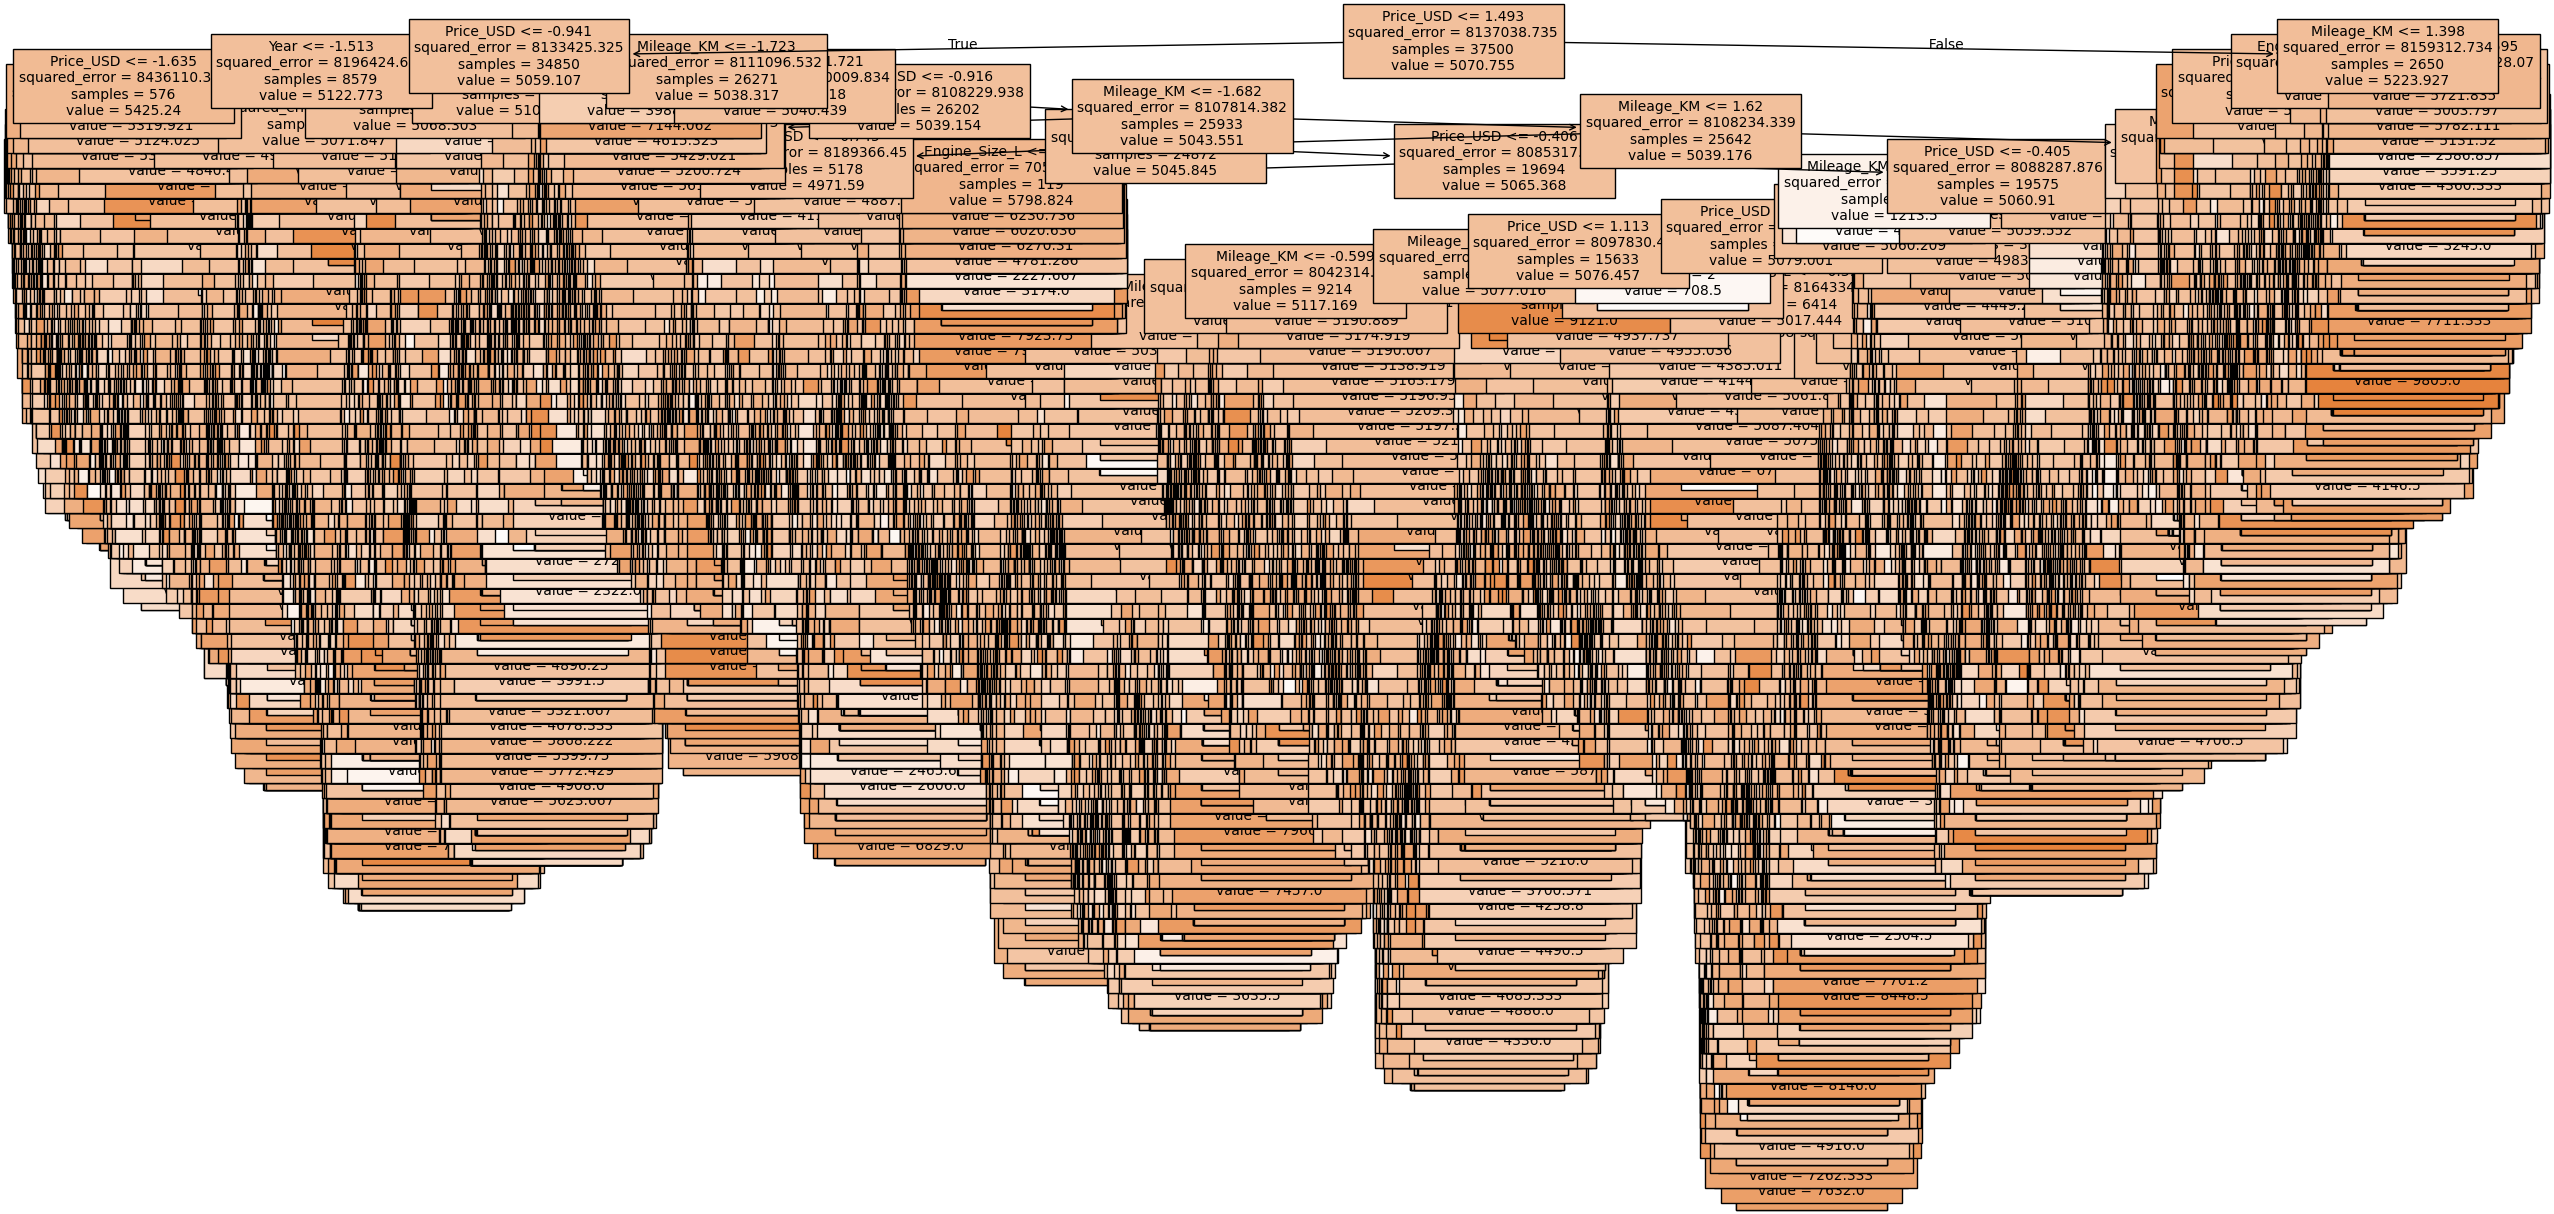

In [20]:
plt.figure(figsize=(30,15))

# Define the feature names explicitly for plotting
feature_names_for_plot = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

tree.plot_tree(reg_tree_model, feature_names=feature_names_for_plot, filled=True, fontsize= 10)
plt.show()

# _Model Performance_

In [21]:
# Make predictions on the test set
y_pred_reg_tree = reg_tree_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_reg_tree = mean_absolute_error(y_test, y_pred_reg_tree)
mse_reg_tree = mean_squared_error(y_test, y_pred_reg_tree)
rmse_reg_tree = np.sqrt(mse_reg_tree)

print("Regression Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_reg_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_reg_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg_tree:.2f}")

Regression Tree Model Performance:
Mean Absolute Error (MAE): 3356.38
Mean Squared Error (MSE): 16865885.89
Root Mean Squared Error (RMSE): 4106.81


In [22]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("K-Nearest Neighbors Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")

K-Nearest Neighbors Regression Model Performance:
Mean Absolute Error (MAE): 2639.25
Mean Squared Error (MSE): 9853448.80
Root Mean Squared Error (RMSE): 3139.02


### Perbandingan Performa Model

Berikut adalah perbandingan metrik kinerja untuk model Regression Tree dan K-Nearest Neighbors (KNN):

| Metrik                 | Regression Tree      | K-Nearest Neighbors    |
| :--------------------- | :------------------- | :--------------------- |
| Mean Absolute Error (MAE)  | 3356.38              | 2639.25                |
| Mean Squared Error (MSE)   | 16865885.89          | 9853448.80             |
| Root Mean Squared Error (RMSE)| 4106.81              | 3139.02                |
|  |  |  |

<div align="justify"> Tabel perbandingan performa tersebut menunjukkan bahwa model K-Nearest Neighbors (KNN) memiliki kinerja yang lebih baik dibandingkan Regression Tree dalam memprediksi Sales Volume. Hal ini terlihat dari nilai MAE, MSE, dan RMSE pada KNN yang semuanya lebih rendah. Secara khusus, MAE dan RMSE yang lebih kecil menandakan bahwa rata-rata kesalahan prediksi KNN lebih rendah dan lebih konsisten, sedangkan MSE yang jauh lebih kecil menunjukkan bahwa model KNN menghasilkan kesalahan besar (large errors) yang lebih sedikit dibandingkan Regression Tree. Dengan demikian, KNN lebih akurat dan lebih stabil dalam memodelkan data ini dibandingkan Regression Tree. </div>

# Kesimpulan

<div align="justify"> Berdasarkan hasil analisis eksploratif (EDA) terhadap dataset BMW Sales Data (2010–2024), ditemukan bahwa variabel Sales Volume memiliki distribusi yang merata di seluruh rentang nilai dan tidak menunjukkan pola hubungan yang berarti dengan variabel numerik lain seperti Year, Engine Size, Mileage, maupun Price. Hal ini juga diperkuat oleh matriks korelasi yang menunjukkan nilai korelasi mendekati nol di semua pasangan variabel, sehingga hubungan linear antar fitur relatif tidak kuat. </div>

<div align="justify"> Setelah dilakukan pelatihan dua model regresi yaitu Regression Tree dan K-Nearest Neighbors (KNN) diperoleh hasil bahwa model KNN memberikan performa prediksi yang lebih baik, ditunjukkan oleh nilai MAE, MSE, dan RMSE yang lebih rendah dibandingkan Regression Tree. Dengan demikian, dapat disimpulkan bahwa model KNN lebih sesuai untuk memprediksi Sales Volume pada dataset ini, karena kemampuannya menangkap pola lokal data lebih baik meskipun hubungan antar variabel bersifat lemah dan tidak linear. Secara keseluruhan, kombinasi EDA dan evaluasi model menunjukkan bahwa dataset ini memiliki karakteristik penyebaran acak, sehingga algoritma berbasis kedekatan seperti KNN menawarkan akurasi prediksi yang lebih unggul dibandingkan model berbasis pemisahan seperti Regression Tree. </div>



# Referensi

<div align="justify"> Halder, R. K., Uddin, M. N., Uddin, M. A., Aryal, S., & Khraisat, A. (2024). Enhancing K-nearest neighbor algorithm: A comprehensive review and performance analysis of modifications. Journal of Big Data, 11, 113. </div>

<div align="justify"> Putra, K. R. (2025). Comparison of Prediction Models: Decision Tree, Random Forest, and Support Vector Regression. Jurnal Informatika dan Rekayasa Perangkat Lunak (JATIKA), 6(1). </div>
